**Business understanding**

child_mort: Fitur ini mewakili angka kematian anak di suatu
wilayah. Biasanya diukur sebagai jumlah kematian per 1.000 kelahiran hidup anak di bawah usia lima tahun. Nilai yang lebih tinggi menunjukkan tingkat kematian anak yang lebih tinggi dan mungkin merupakan indikator buruknya layanan kesehatan dan kondisi kehidupan.

ekspor: Fitur ini mengacu pada nilai barang dan jasa yang diekspor oleh suatu negara. Ini mewakili pendapatan yang dihasilkan dari penjualan barang dan jasa ke negara lain. Nilai ekspor yang lebih tinggi umumnya menunjukkan perekonomian yang lebih kuat dan kehadiran perdagangan internasional.

kesehatan: Fitur ini mewakili pengeluaran untuk layanan kesehatan di suatu daerah. Ini menunjukkan persentase total pengeluaran pemerintah atau PDB (Produk Domestik Bruto) yang dibelanjakan untuk layanan kesehatan. Nilai yang lebih tinggi menunjukkan penekanan yang lebih besar pada layanan kesehatan.

impor: Fitur ini mewakili nilai barang dan jasa yang diimpor oleh suatu negara. Ini mengukur jumlah uang yang dibelanjakan untuk membeli barang dan jasa dari negara lain. Nilai impor yang lebih tinggi menunjukkan ketergantungan yang lebih tinggi terhadap produk impor.

pendapatan: Fitur ini mewakili pendapatan per kapita atau pendapatan rata-rata per orang di suatu kabupaten. Biasanya diukur dalam mata uang lokal atau mata uang yang diakui secara internasional seperti dolar AS. Nilai pendapatan yang lebih tinggi menunjukkan pendapatan rata-rata yang lebih tinggi dan kemungkinan standar hidup yang lebih baik.

inflasi: Fitur ini menunjukkan tingkat inflasi tahunan di suatu wilayah. Inflasi mengacu pada kenaikan umum harga barang dan jasa dari waktu ke waktu. Tingkat inflasi yang lebih tinggi berarti daya beli mata uang menurun, yang dapat berdampak pada perekonomian dan kondisi kehidupan.

life_expec: Fitur ini mewakili rata-rata harapan hidup di suatu wilayah. Biasanya diukur dalam satuan tahun dan menunjukkan usia rata-rata yang diperkirakan akan dijalani seseorang. Nilai yang lebih tinggi menunjukkan layanan kesehatan, kondisi kehidupan, dan kesejahteraan yang lebih baik secara keseluruhan.

total_fer: Fitur ini mewakili total tingkat kesuburan di suatu wilayah. Ini mengukur jumlah rata-rata anak yang dilahirkan seorang wanita selama masa reproduksinya. Nilai yang lebih tinggi menunjukkan angka kelahiran yang lebih tinggi dan mungkin menunjukkan populasi yang lebih muda atau faktor budaya yang mempengaruhi keluarga berencana.

gdpp: Fitur ini mengacu pada PDB per kapita suatu wilayah. Ini mewakili total output ekonomi dibagi dengan populasi. Nilai yang lebih tinggi menunjukkan PDB per orang yang lebih tinggi dan umumnya mencerminkan perekonomian yang lebih kuat dan standar hidup yang lebih tinggi.

Fitur-fitur ini memberikan berbagai aspek indikator sosio-ekonomi dan dapat digunakan untuk menganalisis dan memahami status keuangan dan pembangunan suatu daerah dalam kumpulan data.


------------------------------------------------------------------------

**Tujuan:**

Berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang pada saat terjadi bencana dan bencana alam.

Jadi tujuannya adalah untuk mengklasifikasikan negara-negara dan menemukan negara-negara yang membutuhkan lebih banyak bantuan.

**DATA UNDERSTANDING**

Importing libraries and data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv('Country-data.csv')

In [ ]:
data.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
data.shape

(167, 10)

In [ ]:
data.columns


Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Dari informasi tipe data di atas, semua tipe data berada dalam format yang benar.

In [ ]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
data.duplicated().sum()

0



*   Tidak ada nilai null/duplikat
*    Semua sampel kumpulan data terlihat baik-baik saja untuk saat ini



In [ ]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
# Country with min exports
print(data[data.exports == data.exports.min()].country.values[0], '(%d)' %(data.exports.min()))

Myanmar (0)


In [ ]:
# Country with max exports
print(data[data.exports == data.exports.max()].country.values[0], '(%d)' %(data.exports.max()))

Singapore (200)


In [ ]:
# Country with min inflation
print(data[data.inflation == data.inflation.min()].country.values[0], '(%d)' %(data.inflation.min()))

Seychelles (-4)


In [ ]:
# Country with min inflation
print(data[data.inflation == data.inflation.max()].country.values[0], '(%d)' %(data.inflation.max()))

Nigeria (104)


Visualization

<Axes: >

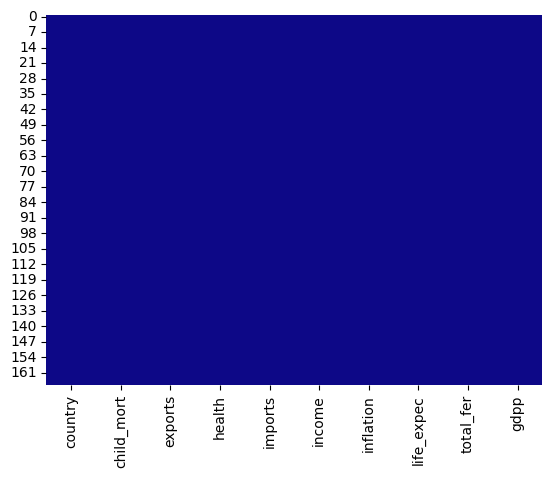

In [ ]:
sns.heatmap(data.isnull(), cmap = 'plasma', cbar = False)

tidak ada nilai null dan duplikat

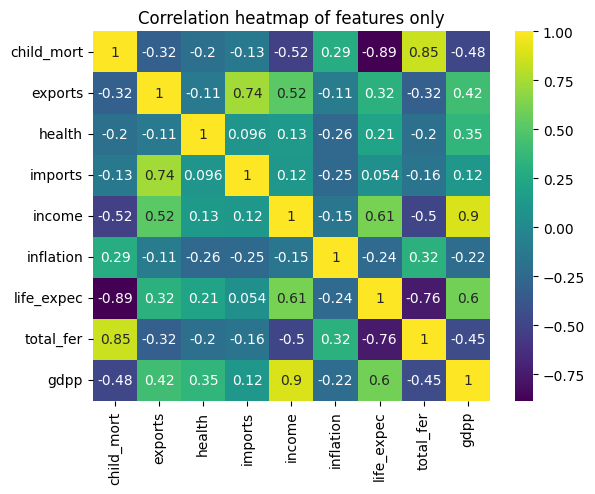

In [ ]:
corr_matrix = data.drop(columns = ['country']).corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'viridis')

plt.title('Correlation heatmap of features only')
plt.show()



* Korelasi positif yang tinggi antara total kesuburan (jumlah anak yang akan dilahirkan oleh setiap wanita jika tingkat kesuburan usia saat ini tetap sama) & kematian anak (kematian anak di bawah usia 5 tahun per 1000 kelahiran hidup), impor & ekspor , pendapatan & ekspor, PDB per kapita & pendapatan,

* harapan hidup & pendapatan. Ada juga sedikit korelasi positif antara pendapatan dan kematian anak.

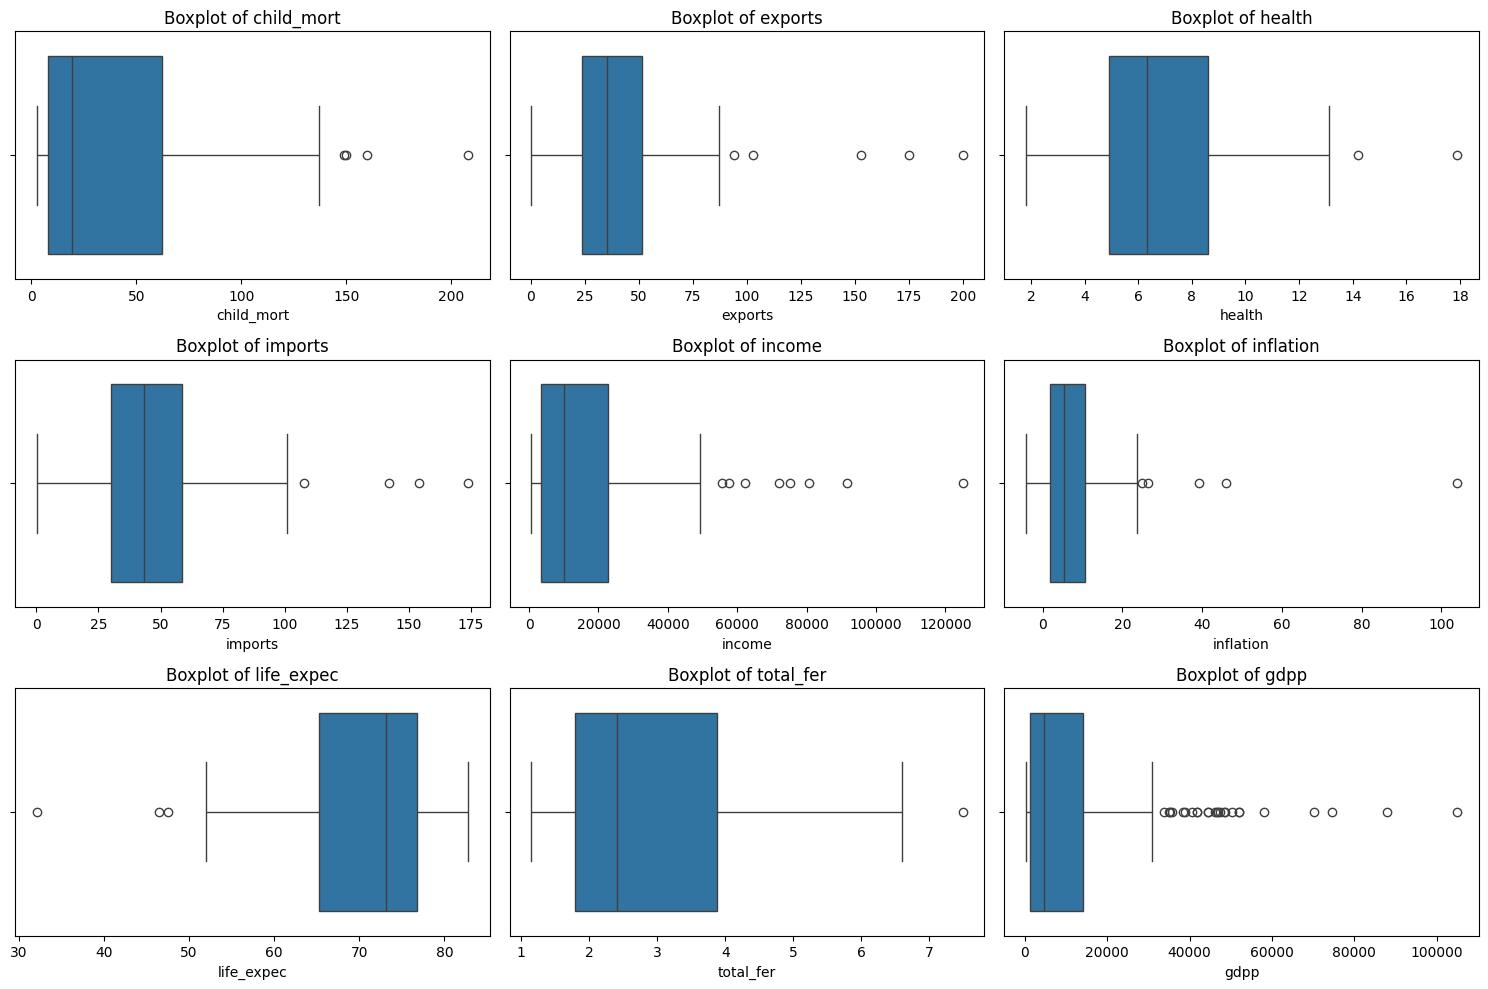

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Ada beberapa outlier tetapi tidak masalah dan tidak berisik

Kumpulan data berisi sejumlah outlier. Namun, penting untuk diingat bahwa outlier tidak boleh dihilangkan secara sembarangan. Hal tersebut hanya boleh dihilangkan jika terdapat alasan yang sah dan bukti yang kuat, karena hal tersebut belum tentu salah atau tidak relevan.

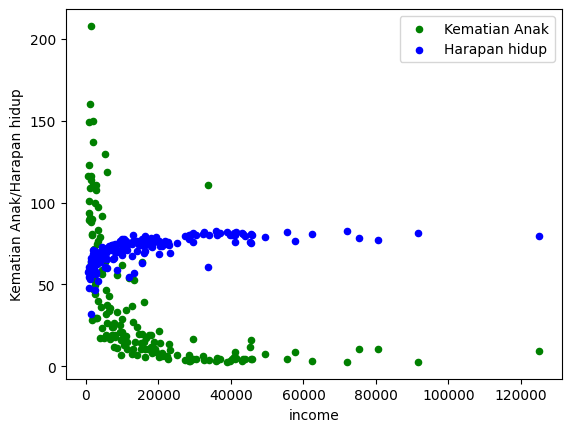

In [ ]:
ax1 = data.plot(kind = 'scatter', x = 'income', y = 'child_mort', color = 'g')
ax2 = data.plot(kind = 'scatter', x = 'income', y = 'life_expec', color = 'b', ax = ax1)

plt.legend(labels = ['Kematian Anak', 'Harapan hidup'])
plt.ylabel('Kematian Anak/Harapan hidup')

plt.show()

Seperti yang diharapkan, kematian anak di bawah usia 5 tahun berkorelasi dengan rata-rata lama hidup seorang anak yang baru lahir berdasarkan pola kematian saat ini. Dengan meningkatnya pendapatan, kedua nilai tersebut meningkat.

In [ ]:
for column in data.drop(columns=['country']).columns:
    fig = px.histogram(data, x=data[column])
    fig.update_layout(template='plotly')
    fig.show()

Bagan di diatas menunjukkan sepuluh negara dengan nilai tertinggi dan terendah untuk masing-masing fitur.

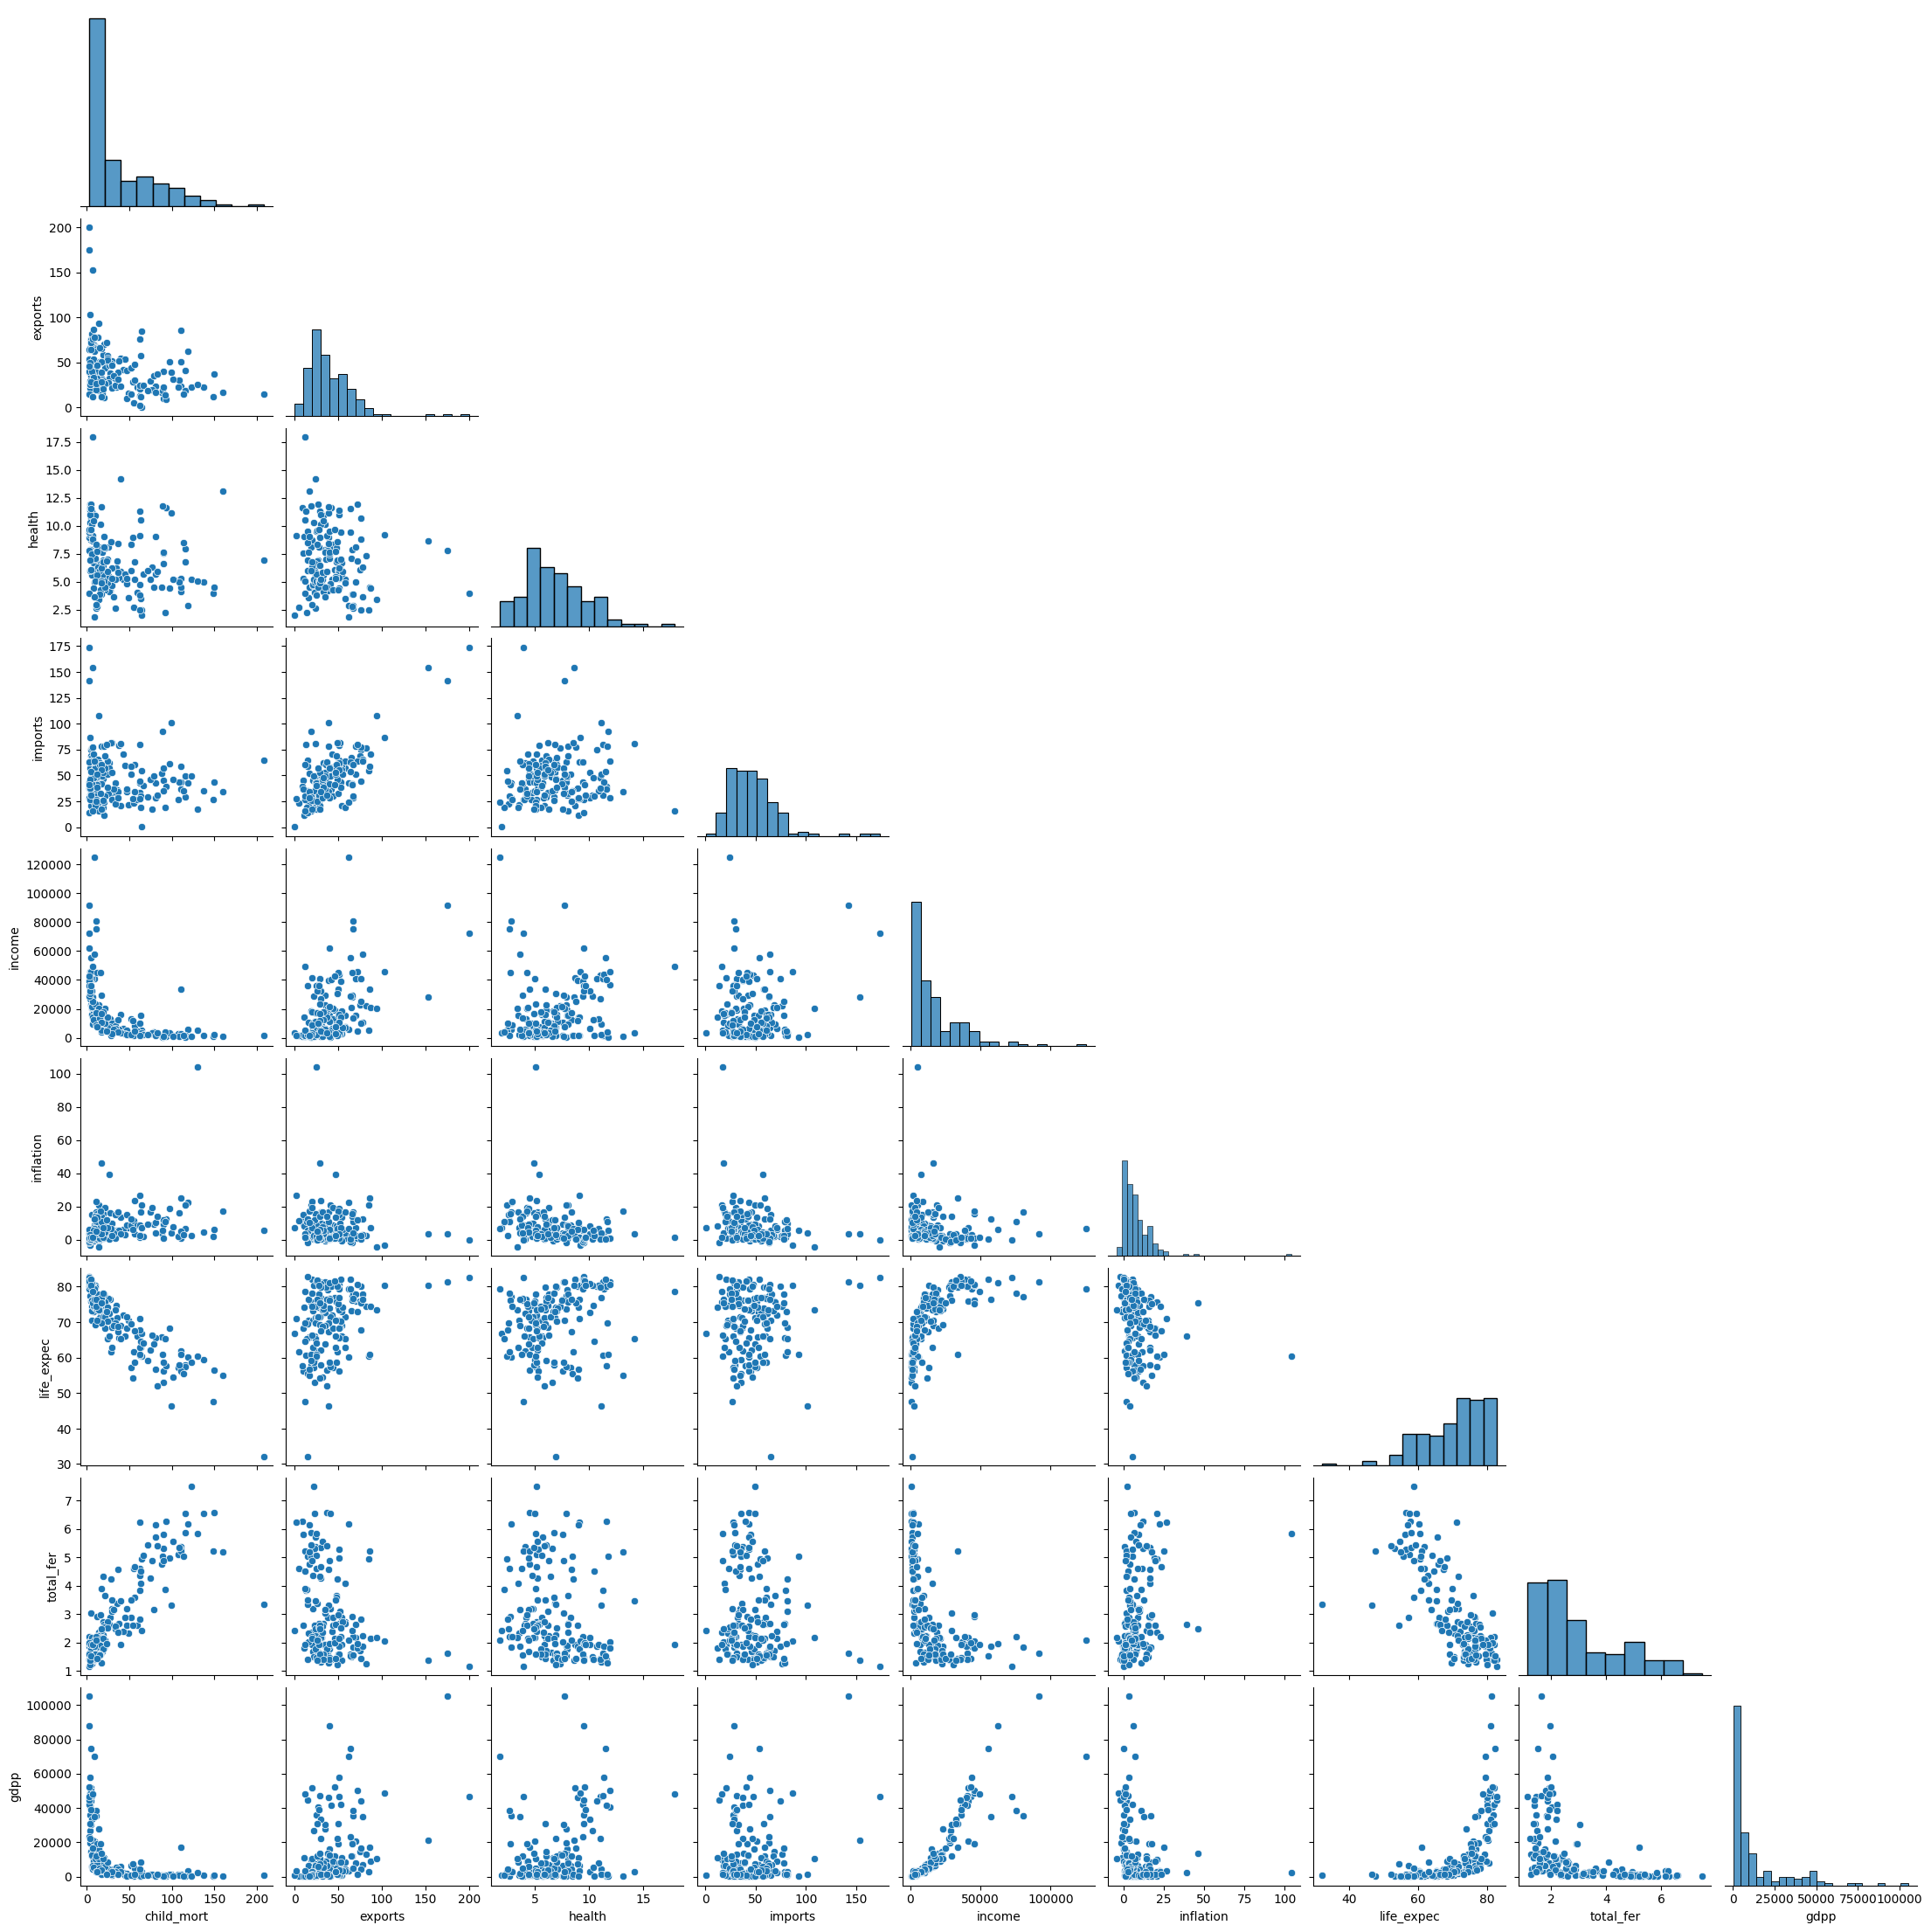

In [ ]:
sns.pairplot(data, corner =True)

* Child_mort memiliki hubungan negatif dengan PDB karena angka kematian anak semakin kecil maka PDB juga meningkat dan sebaliknya.

* Ekspor,  Income, Income memiliki hubungan positif yang jelas dengan PDB.

* Total_fer dan child_mort memiliki hubungan positif.

* Total_fer dan life_expec memiliki hubungan negatif.

* Life_expec dan childe_mort memiliki hubungan negatif.

In [ ]:
# mengurutkan pendapatan bersih per orang untuk setiap negara
income = data.sort_values(by = ['income'], ascending=True)
income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
...,...,...,...,...,...,...,...,...,...,...
133,Singapore,2.8,200.00,3.96,174.0,72100,-0.046,82.7,1.15,46600
82,Kuwait,10.8,66.70,2.63,30.4,75200,11.200,78.2,2.21,38500
23,Brunei,10.5,67.40,2.84,28.0,80600,16.700,77.1,1.84,35300
91,Luxembourg,2.8,175.00,7.77,142.0,91700,3.620,81.3,1.63,105000


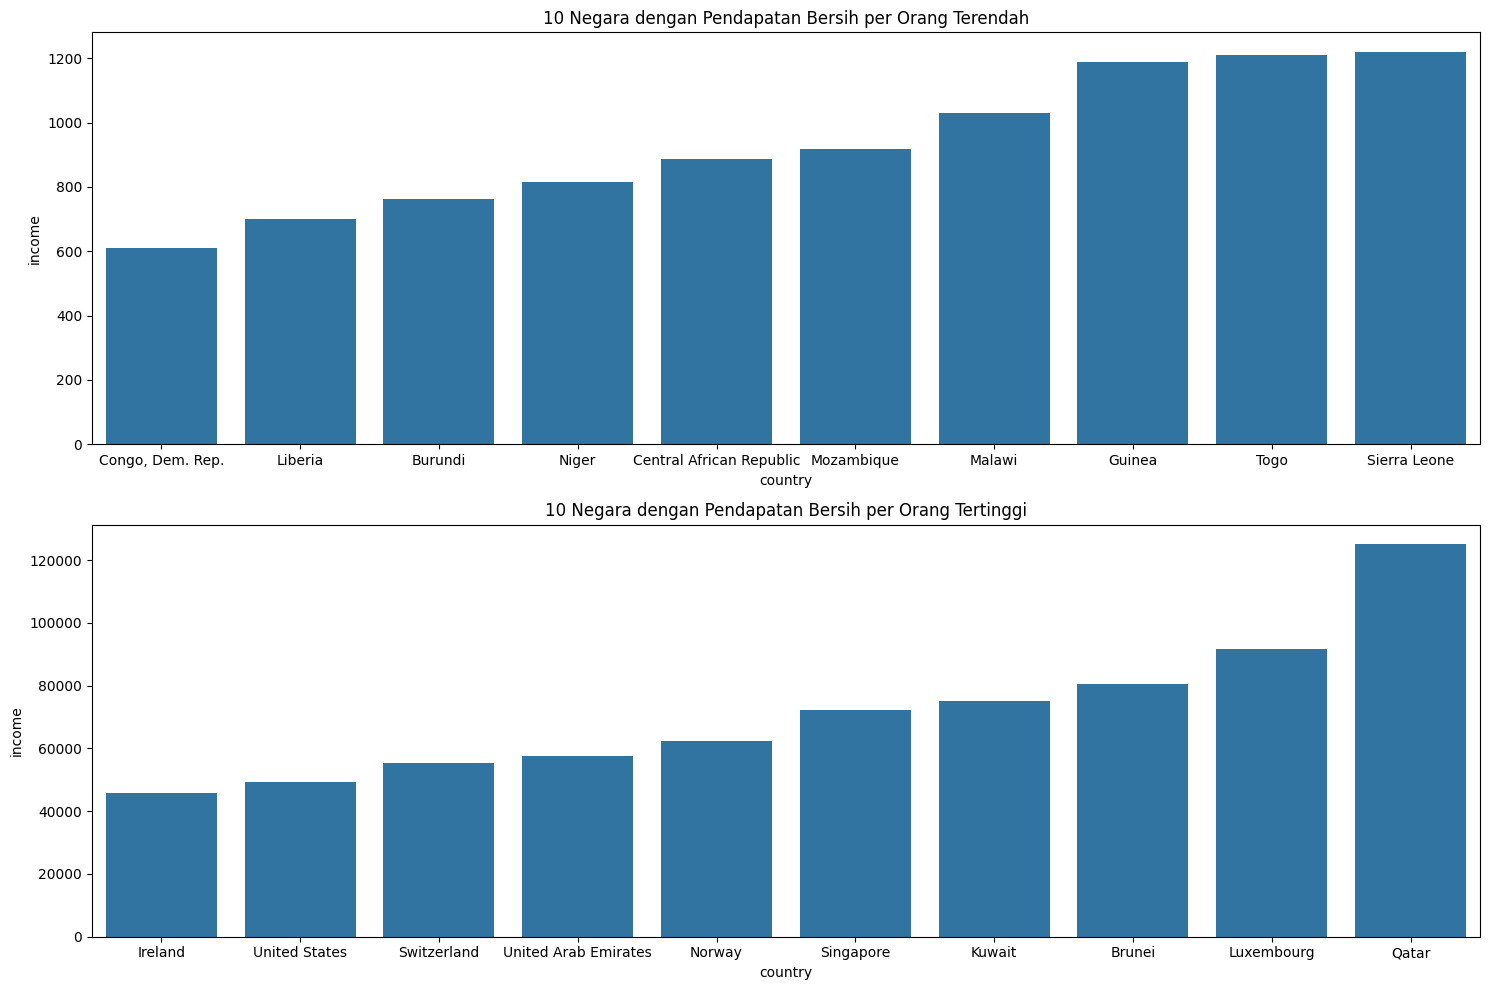

In [ ]:
plt.figure(figsize=[15, 10])
plt.subplot(2, 1, 1)
sns.barplot(x=income.sort_values(by='income', ascending=True)['country'].head(10),
            y=income.sort_values(by='income', ascending=True)['income'].head(10))
plt.title("10 Negara dengan Pendapatan Bersih per Orang Terendah")
plt.subplot(2, 1, 2)
sns.barplot(x=income.sort_values(by='income', ascending=True)['country'].tail(10),
            y=income.sort_values(by='income', ascending=True)['income'].tail(10))
plt.title("10 Negara dengan Pendapatan Bersih per Orang Tertinggi")
plt.tight_layout()

plt.show()

* Dari plot di atas terlihat bahwa 5 negara teratas dengan pendapatan bersih per orang terendah adalah Kongo, Demokrat. Rep., Liberia, Burundi Niger dan Republik Afrika Tengah

* negara teratas dengan pendapatan bersih per orang tertinggi adalah Qatar, Luksemburg, Brunei, Kuwait dan Singapura.

**Data Preparation**

In [ ]:
data = data.drop(columns=['country'])

Penghapusan kolom country karena country nilainya selalu unique

In [ ]:
#normalisasi data
scaler=StandardScaler()
df_scaled=scaler.fit_transform(data.iloc[:,1:])
df_scaled=pd.DataFrame(df_scaled,columns=data.iloc[:,1:].columns, index=data.index )
df_final=pd.concat([data.iloc[:,0],df_scaled],axis=1)

In [ ]:
df_final

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,16.6,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,27.3,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,119.0,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,10.3,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,29.2,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,17.1,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,23.3,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,56.3,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [ ]:
from sklearn.decomposition import PCA

# Misalkan Anda sudah memiliki data x yang ingin Anda reduksi dimensinya
pca = PCA(n_components=3)
components = pca.fit_transform(df_final)
pca_data = pd.DataFrame(data=components,
                        columns=['component 1', 'component 2', 'component 3'])


In [ ]:
pca_data

,component 1,component 2,component 3,cluster
0,51.997264,-0.464306,0.371084,1
1,-21.674813,-0.926403,-0.418135,0
2,-10.956225,-1.073646,-0.631193,0
3,80.769905,1.050036,-0.725583,2
4,-27.984063,-0.068716,-0.606647,0
...,...,...,...,...
162,-9.024040,-0.558724,-1.205285,0
163,-21.137027,-1.934977,-0.260916,0
164,-14.974062,0.479982,-1.735698,0
165,18.083889,-1.062729,-0.485403,1


In [ ]:

# Setelah fitting, Anda dapat mengakses explained variance ratio
print(pca.explained_variance_ratio_)

print("Total informasi yang diterima dari ketiga komponen: ", sum(pca.explained_variance_ratio_))


[9.96464720e-01 1.19972022e-03 8.10204808e-04]
Total informasi yang diterima dari ketiga komponen:  0.9984746445620454


Karena jumlah fitur yang sangat banyak (9 fitur tanpa variabel negara), sementara jumlah data terbatas (hanya 167 negara), dan untuk memudahkan visualisasi hasil pengelompokan, kami menggunakan analisis komponen utama (PCA) untuk mengurangi dimensi fitur. Fitur yang semula terdiri dari 9 akan direduksi menjadi 3 fitur (3 komponen).

Dari hasil kode di bawah, kita dapat melihat bahwa komponen pertama menyimpan sekitar 55% informasi, komponen kedua menyimpan sekitar 13,4% informasi, dan komponen ketiga menyimpan sekitar 12,3% informasi. Jadi, secara total, ketiga komponen tersebut menyimpan sekitar 80,6% informasi dari data asli.

**MODELING**

Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

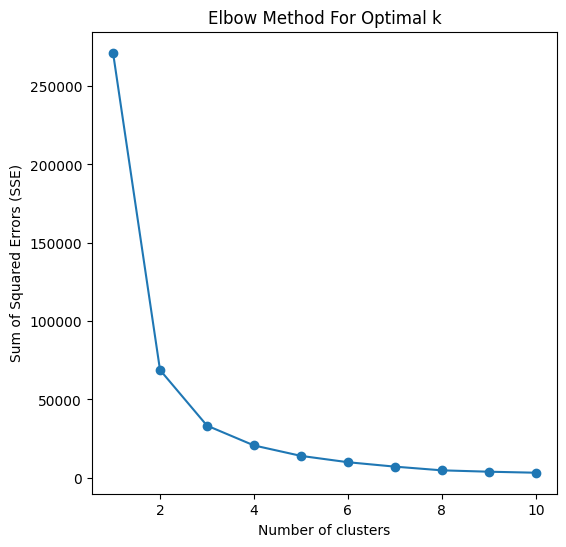

In [ ]:
# Menggunakan Elbow Method untuk menemukan jumlah klaster optimal
sse = []
k_range = range(1, 11)  # Kita akan mencoba dengan klaster dari 1 sampai 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_final)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()

Pengelompokan K-Means -  Elbow Method :

K-Means adalah algoritma pengelompokan populer yang mempartisi data menjadi beberapa kelompok berdasarkan kesamaan. Mari terapkan pengelompokan K-Means pada data berskala dan tentukan jumlah klaster optimal menggunakan metode Elbow. Plot metode Elbow membantu kita menemukan jumlah cluster yang optimal dengan menemukan titik "siku" di mana inersia mulai berkurang dengan kecepatan yang lebih lambat. Pada plot terlihat bahwa inersia menurun secara signifikan hingga sekitar 3 cluster dan kemudian mulai mendatar.


Berdasarkan metode Elbow, kami akan memilih k=3 cluster untuk analisis kami. Selanjutnya kita akan menyesuaikan model K-Means dengan 3 cluster dan menganalisis karakteristik masing-masing cluster.

In [ ]:
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_data)

# Menambahkan kolom cluster ke dataframe
pca_data['cluster'] = kmeans.labels_
print(pca_data.head())

   component 1  component 2  component 3  cluster
0    51.997264    -0.464306     0.371084        1
1   -21.674813    -0.926403    -0.418135        0
2   -10.956225    -1.073646    -0.631193        0
3    80.769905     1.050036    -0.725583        2
4   -27.984063    -0.068716    -0.606647        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Menghitung jumlah data dalam setiap cluster
cluster_counts = pd.Series(kmeans.labels_).value_counts()
print(cluster_counts)

0    112
1     36
2     19
Name: count, dtype: int64


In [ ]:
# Menambahkan kolom cluster ke DataFrame asli
df_final['cluster'] = pca_data['cluster']

# Menghitung statistik deskriptif untuk setiap cluster
cluster_summary = df_final.groupby('cluster').mean()
print(cluster_summary)


         child_mort   exports    health   imports    income  inflation  \
cluster                                                                  
0         14.206250  0.213331  0.143526  0.100208  0.339766  -0.162055   
1         67.497222 -0.502833 -0.293284 -0.260184 -0.689427   0.169513   
2        124.742105 -0.304796 -0.290353 -0.097719 -0.696551   0.634086   

         life_expec  total_fer      gdpp  
cluster                                   
0          0.550792  -0.552713  0.299691  
1         -0.848715   0.837089 -0.610540  
2         -1.638681   1.672034 -0.609785  


In [ ]:
for cluster in cluster_summary.index:
    print(f"Cluster {cluster}:")
    print(f"  - Tingkat Kematian Anak: {cluster_summary.loc[cluster, 'child_mort']:.2f}")
    print(f"  - Ekspor: {cluster_summary.loc[cluster, 'exports']:.2f}")
    print(f"  - Kesehatan: {cluster_summary.loc[cluster, 'health']:.2f}")
    print(f"  - Impor: {cluster_summary.loc[cluster, 'imports']:.2f}")
    print(f"  - Pendapatan: {cluster_summary.loc[cluster, 'income']:.2f}")
    print(f"  - Inflasi: {cluster_summary.loc[cluster, 'inflation']:.2f}")
    print(f"  - Harapan Hidup: {cluster_summary.loc[cluster, 'life_expec']:.2f}")
    print(f"  - Total Kesuburan: {cluster_summary.loc[cluster, 'total_fer']:.2f}")
    print(f"  - GDP per Kapita: {cluster_summary.loc[cluster, 'gdpp']:.2f}")
    print("\n")

Cluster 0:
  - Tingkat Kematian Anak: 14.21
  - Ekspor: 0.21
  - Kesehatan: 0.14
  - Impor: 0.10
  - Pendapatan: 0.34
  - Inflasi: -0.16
  - Harapan Hidup: 0.55
  - Total Kesuburan: -0.55
  - GDP per Kapita: 0.30


Cluster 1:
  - Tingkat Kematian Anak: 67.50
  - Ekspor: -0.50
  - Kesehatan: -0.29
  - Impor: -0.26
  - Pendapatan: -0.69
  - Inflasi: 0.17
  - Harapan Hidup: -0.85
  - Total Kesuburan: 0.84
  - GDP per Kapita: -0.61


Cluster 2:
  - Tingkat Kematian Anak: 124.74
  - Ekspor: -0.30
  - Kesehatan: -0.29
  - Impor: -0.10
  - Pendapatan: -0.70
  - Inflasi: 0.63
  - Harapan Hidup: -1.64
  - Total Kesuburan: 1.67
  - GDP per Kapita: -0.61






#### Cluster 0: Negara dengan Indikator Sosial-Ekonomi Positif
- **Tingkat Kematian Anak (child_mort)**: Rata-rata 14.21, yang menunjukkan tingkat kematian anak yang rendah.
- **Ekspor (exports)**: Rata-rata 0.21, menunjukkan kontribusi ekspor yang cukup baik terhadap PDB.
- **Kesehatan (health)**: Rata-rata 0.14, menunjukkan pengeluaran kesehatan yang cukup baik.
- **Impor (imports)**: Rata-rata 0.10, menunjukkan keseimbangan dalam impor.
- **Pendapatan (income)**: Rata-rata 0.34, menunjukkan pendapatan yang lebih tinggi dibandingkan cluster lain.
- **Inflasi (inflation)**: Rata-rata -0.16, menunjukkan tingkat inflasi yang relatif stabil dan rendah.
- **Harapan Hidup (life_expec)**: Rata-rata 0.55, menunjukkan harapan hidup yang tinggi.
- **Total Kesuburan (total_fer)**: Rata-rata -0.55, menunjukkan tingkat kesuburan yang lebih rendah.
- **GDP per Kapita (gdpp)**: Rata-rata 0.30, menunjukkan GDP per kapita yang relatif tinggi.

**Kesimpulan untuk Cluster 0**: Negara-negara dalam cluster ini memiliki indikator sosial-ekonomi yang sangat positif. Mereka cenderung memiliki tingkat kematian anak yang rendah, harapan hidup yang tinggi, pendapatan yang tinggi, dan inflasi yang stabil. Cluster ini kemungkinan besar terdiri dari negara-negara maju atau negara berkembang dengan kinerja ekonomi dan sosial yang baik.

#### Cluster 1: Negara dengan Indikator Sosial-Ekonomi Menengah
- **Tingkat Kematian Anak (child_mort)**: Rata-rata 67.50, yang menunjukkan tingkat kematian anak yang menengah.
- **Ekspor (exports)**: Rata-rata -0.50, menunjukkan kontribusi ekspor yang rendah terhadap PDB.
- **Kesehatan (health)**: Rata-rata -0.29, menunjukkan pengeluaran kesehatan yang rendah.
- **Impor (imports)**: Rata-rata -0.26, menunjukkan tingkat impor yang rendah.
- **Pendapatan (income)**: Rata-rata -0.69, menunjukkan pendapatan yang rendah.
- **Inflasi (inflation)**: Rata-rata 0.17, menunjukkan tingkat inflasi yang sedikit lebih tinggi.
- **Harapan Hidup (life_expec)**: Rata-rata -0.85, menunjukkan harapan hidup yang menengah.
- **Total Kesuburan (total_fer)**: Rata-rata 0.84, menunjukkan tingkat kesuburan yang lebih tinggi.
- **GDP per Kapita (gdpp)**: Rata-rata -0.61, menunjukkan GDP per kapita yang rendah.

**Kesimpulan untuk Cluster 1**: Negara-negara dalam cluster ini memiliki indikator sosial-ekonomi yang menengah. Mereka mungkin berada pada tahap perkembangan yang sedang, dengan tantangan dalam kesehatan, pendapatan, dan kontribusi ekspor yang rendah. Cluster ini kemungkinan besar terdiri dari negara-negara berkembang dengan kinerja ekonomi dan sosial yang sedang.

#### Cluster 2: Negara dengan Indikator Sosial-Ekonomi Negatif
- **Tingkat Kematian Anak (child_mort)**: Rata-rata 124.74, yang menunjukkan tingkat kematian anak yang sangat tinggi.
- **Ekspor (exports)**: Rata-rata -0.30, menunjukkan kontribusi ekspor yang rendah terhadap PDB.
- **Kesehatan (health)**: Rata-rata -0.29, menunjukkan pengeluaran kesehatan yang rendah.
- **Impor (imports)**: Rata-rata -0.10, menunjukkan tingkat impor yang rendah.
- **Pendapatan (income)**: Rata-rata -0.70, menunjukkan pendapatan yang rendah.
- **Inflasi (inflation)**: Rata-rata 0.63, menunjukkan tingkat inflasi yang tinggi.
- **Harapan Hidup (life_expec)**: Rata-rata -1.64, menunjukkan harapan hidup yang sangat rendah.
- **Total Kesuburan (total_fer)**: Rata-rata 1.67, menunjukkan tingkat kesuburan yang sangat tinggi.
- **GDP per Kapita (gdpp)**: Rata-rata -0.61, menunjukkan GDP per kapita yang rendah.

**Kesimpulan untuk Cluster 2**: Negara-negara dalam cluster ini memiliki indikator sosial-ekonomi yang sangat negatif. Mereka menghadapi tantangan besar dalam kesehatan, ekonomi, dan stabilitas sosial. Tingkat kematian anak yang tinggi dan harapan hidup yang sangat rendah menunjukkan masalah serius dalam bidang kesehatan. Cluster ini kemungkinan besar terdiri dari negara-negara yang paling kurang berkembang atau menghadapi krisis sosial-ekonomi yang berat.

### Rangkuman Keseluruhan
- **Cluster 0**: Negara-negara maju atau berkembang dengan kinerja ekonomi dan sosial yang baik.
- **Cluster 1**: Negara-negara berkembang dengan kinerja ekonomi dan sosial menengah, menghadapi beberapa tantangan.
- **Cluster 2**: Negara-negara yang paling kurang berkembang atau mengalami krisis dengan indikator sosial-ekonomi yang sangat buruk.

Dari hasil ini, Anda dapat mengidentifikasi area yang perlu diperhatikan untuk perbaikan kebijakan, pengalokasian sumber daya, dan strategi pembangunan yang lebih efektif sesuai dengan kebutuhan masing-masing cluster.

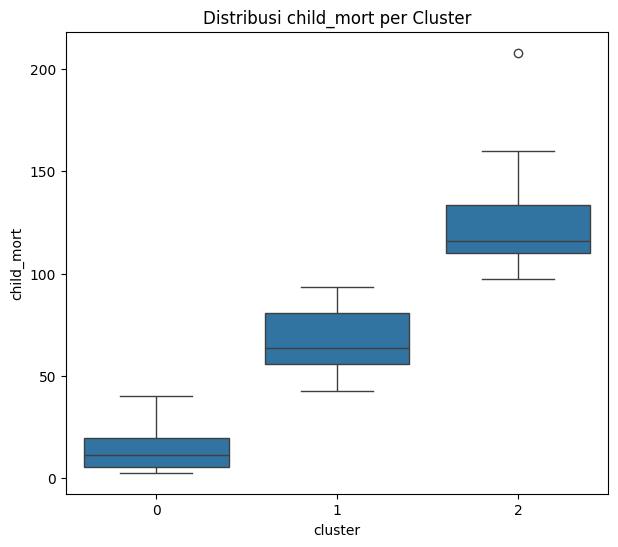

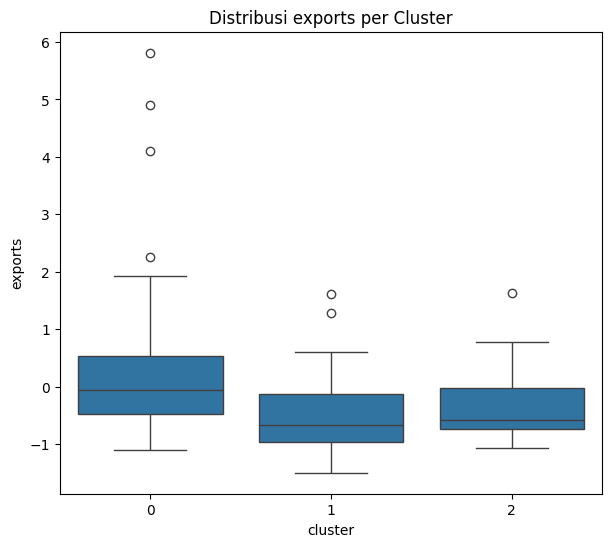

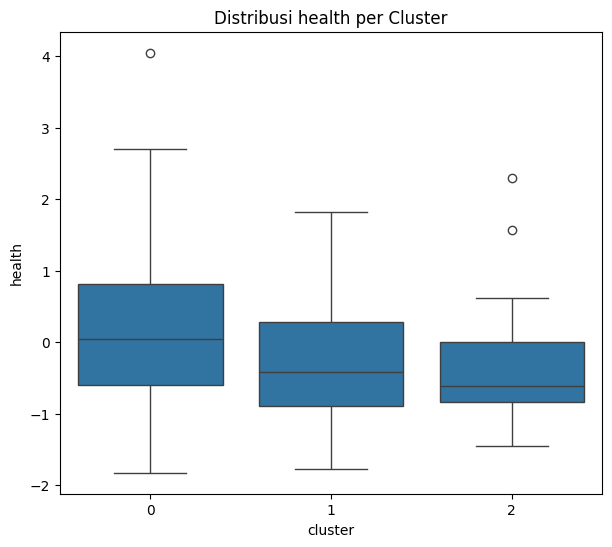

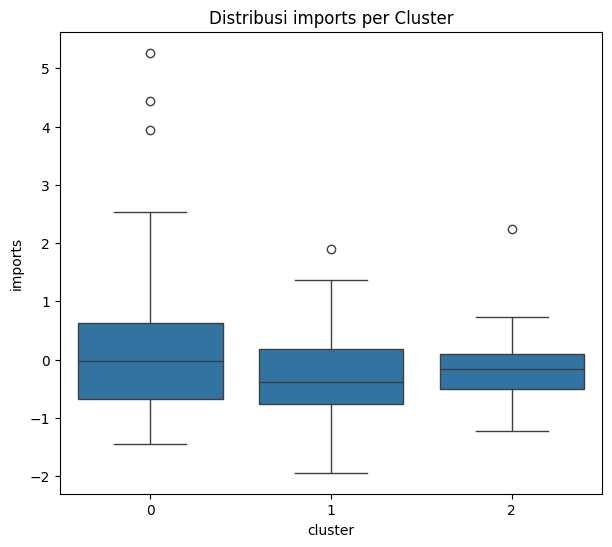

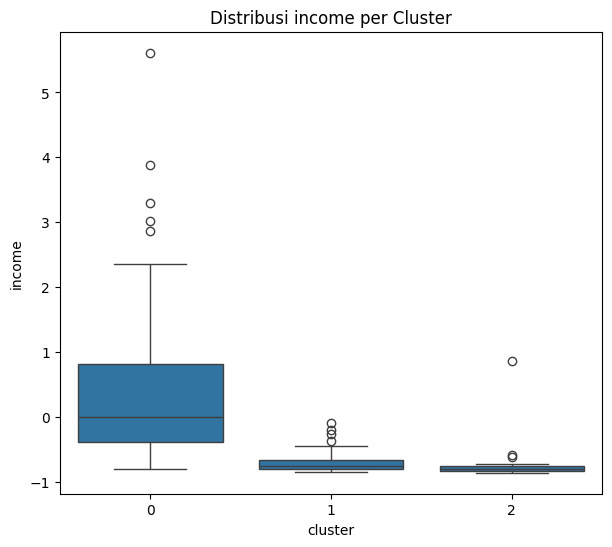

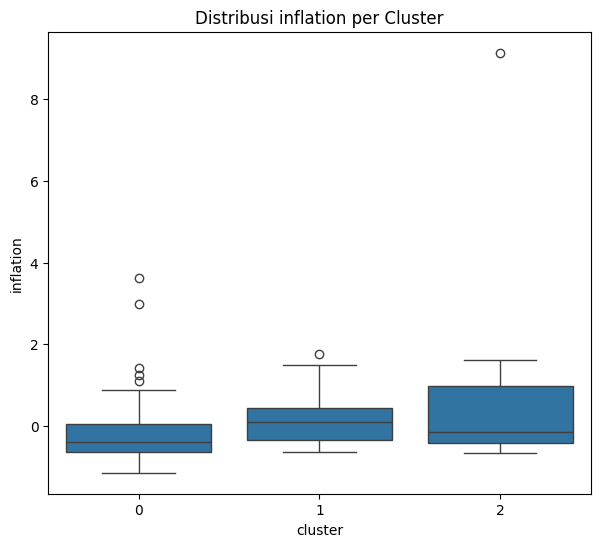

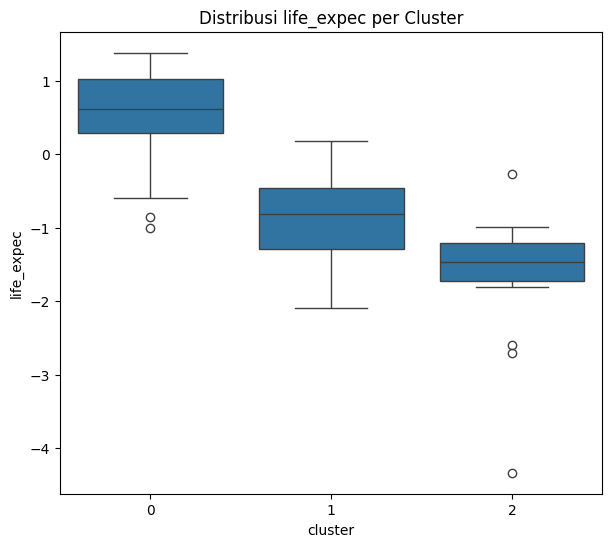

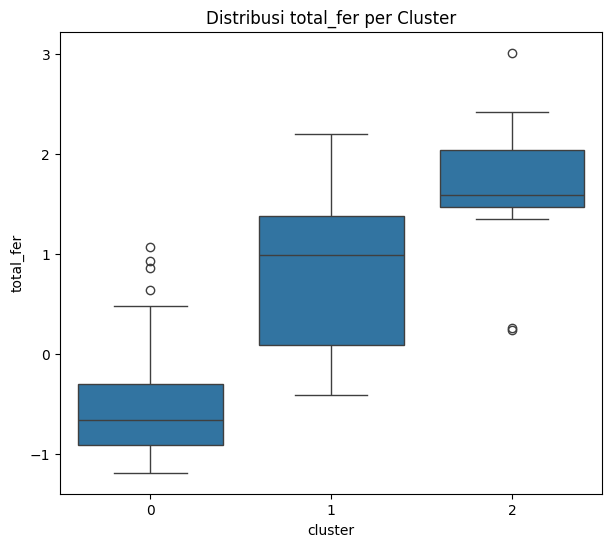

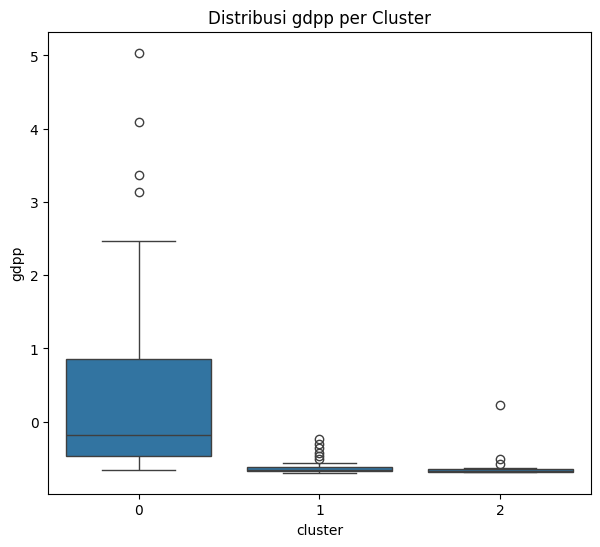

In [ ]:
# Visualisasi distribusi fitur per cluster menggunakan boxplot
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for feature in features:
    plt.figure(figsize=(7, 6))
    sns.boxplot(x='cluster', y=feature, data=df_final)
    plt.title(f'Distribusi {feature} per Cluster')
    plt.show()

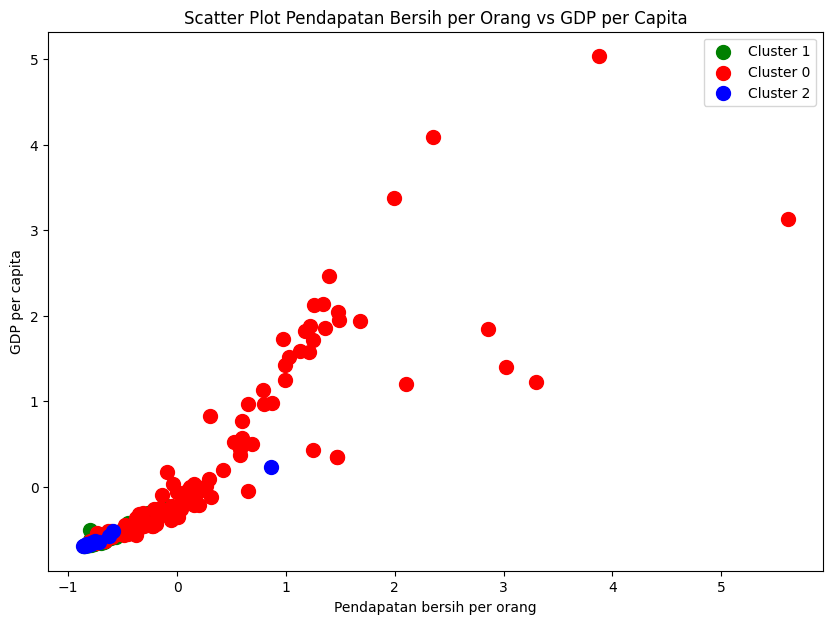

In [ ]:
plt.figure(figsize=(10, 7))

# Menggunakan warna yang berbeda untuk setiap cluster
colors = ['red', 'green', 'blue']
for cluster in df_final['cluster'].unique():
    subset = df_final== cluster]
    plt.scatter(subset['income'], subset['gdpp'], s=100, label=f'Cluster {cluster}', color=colors[cluster])

# Menambahkan label dan judul plot
plt.xlabel('Pendapatan bersih per orang')
plt.ylabel('GDP per capita')
plt.title('Scatter Plot Pendapatan Bersih per Orang vs GDP per Capita')
plt.legend()
plt.show()

Cluster 0 : Pendapatan bersih per orang yang lebih rendah dan Produk Domestik Bruto (PDB) per kapita.

Kelompok 2 : Pendapatan bersih per orang tertinggi dan Produk Domestik Bruto (PDB) per kapita.

Kelompok 1: Pendapatan bersih per orang menengah dan Produk Domestik Bruto (PDB) per kapita.

Kita dapat melihat dalam grafik ini perubahan paling signifikan dalam segmentasi adalah kenaikan antara kedua variabel tersebut.

Yang,berarti perbedaan paling signifikan antara ketiga kelompok tersebut adalah bagaimana negara-negara tersebut, saat produksi ekonomi tumbuh, penduduk secara umum merasakan pertumbuhan ini dalam hal Pendapatan bersih per orang.

**EVALUATION**

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluasi metrik internal: Inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Evaluasi metrik eksternal: Silhouette Score
silhouette_avg = silhouette_score(pca_data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Inertia: 32902.783681670946
Silhouette Score: 0.6804023903070079


Inertia: Nilai inertia yang tinggi (33312.00258321653) menunjukkan bahwa titik-titik dalam klaster-klasternya tersebar luas, yang bisa mengindikasikan bahwa klaster-klasternya mungkin tidak terlalu padat atau terpisah dengan baik.

Silhouette Score: Nilai silhouette score yang tinggi (0.6753645526361538) menandakan bahwa klaster-klasternya berada dalam bentuk yang baik, dengan titik-titik dalam satu klaster berada lebih dekat satu sama lain dan lebih jauh dari klaster lain. Ini menunjukkan bahwa klaster-klasternya cukup terdefinisi dengan baik.

